<a href="https://colab.research.google.com/github/John-Testx/Titanic_case_collab/blob/main/Trabajo_1_AI_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caso - Titanic Kaggle dataset

Cargar dataset y librerias:
- Pandas
- Gráficos matplot, seaborn
- Precisión, exactitud o medidas para verificar el modelo son las de sklearn.

Leer dataset posteriormente usando pandas.

In [392]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
datos = pd.read_csv("train.csv")

# Analisis EDA (Investigar dataset)

In [393]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Entre las variables más importantes se puede mencionar:

- pclass: Indicador del nivel socioeconómico (NSE)
  - 1.º = Alto
  - 2.º = Medio
  - 3.º = Bajo

- sibsp: El conjunto de datos define las relaciones familiares de esta manera:
  - Sibling = hermano, hermana, hermanastro, hermanastra
  - Spouse = esposo, esposa (se ignoraron amantes y prometidos)

- parch:
  - El conjunto de datos define las relaciones familiares de esta manera:
    - Parent = madre, padre
    - Child = hija, hijo, hijastra, hijastro
    - Algunos niños viajaron solo con una niñera, por lo que parch=0 para ellos.

## Verificar medidas estadisticas en variables o columnas del dataset

In [394]:
datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Verificar gráfico que muestra la cantidad de supervivientes en el caso titanic.

<Axes: xlabel='Survived', ylabel='count'>

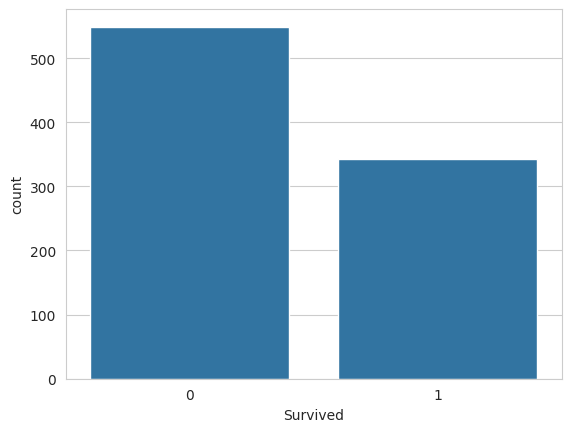

In [395]:
import seaborn as sb
sb.countplot(x="Survived", data=datos)

La mayoría de personas murieron o no sobrevivió. No es muy especifico si no se utilizan otros factores (edad, sexo, etc.)

## Verificar gráfico que muestra la cantidad de supervivientes por género

<Axes: xlabel='Survived', ylabel='count'>

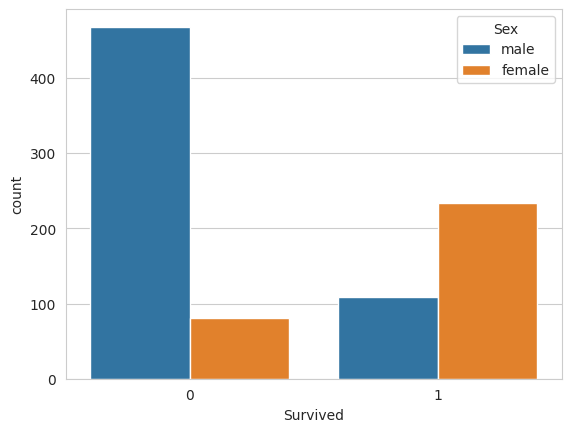

In [396]:
sb.countplot(x="Survived", data=datos, hue="Sex")

La mayor cantidad de muertes o la mortalidad fue en hombres comparado al sexo femenino.

## Verificar si hay valores nulos en cada columna del DataFrame

In [397]:

datos.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Entre las propiedades o variables, que poseen datos nulos están la edad, la cabina y el punto donde se embarcaron algunos de los pasajeros. La edad en especial que muestra que al menos 177 pasajeros no poseen una edad definida.

## Crear un histograma para visualizar la distribución de la columna 'Age'

- Se utiliza seaborn para crear el gráfico de distribución (displot), 'x="Age"' para colocar la edad en el eje x.

En este caso, se observa la variable de edad sin modificarla aún, esto para precisamente observar en que rangos de edad se encuentran los pasajeros antes de remover los registros de edad nulos que hay en el dataset.

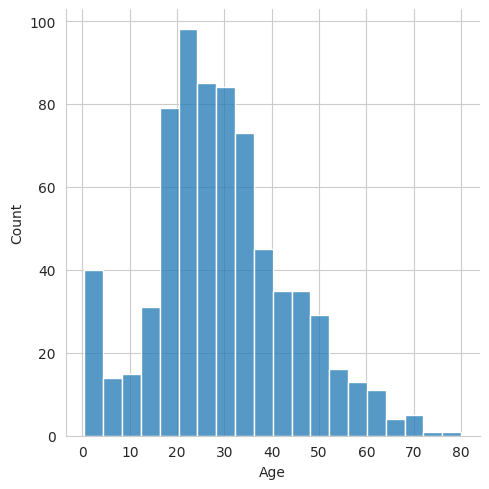

In [398]:
sb.displot(x="Age", data=datos)

Los rangos de edad de los pasajeros estan mayormente distribuidos entre los 20-40 años.

## Verificar y mostrar la columna 'Age'


In [399]:

datos["Age"]

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,NaN
889,26.0


Se comprueba tal como en el `datos.isna().sum()` que el dataset posee supervivientes sin edad aparente lo cual necesita ser estudiado.

## Edad promedio de los supervivientes

In [400]:
datos["Age"].mean()

np.float64(29.69911764705882)

La edad promedio de los pasajeros ronda los 29 años de edad.

## Limpiar valores nulos (Nan, None)

In [401]:
datos["Age"] = datos["Age"].fillna(datos["Age"].mean())

Se ingresa la edad promedio de los pasajeros del barco a pasajeros sin edad aparente.

In [402]:
datos["Age"]

,Age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


Se verifica que ahora si no hay valores nulos.
Los 891 pasajeros tienen edad.

Los pasajeros que no poseen una edad valida fueron establecidos con la edad promedio del resto de la tripulación que es de 29 años.

## Verificar las edades mínimas y máximas de los pasajeros

In [403]:
min_age= datos["Age"].min()
max_age= datos["Age"].max()
print(f"Edad mínima: {min_age}")
print(f"Edad máxima: {max_age}")

Edad mínima: 0.42
Edad máxima: 80.0


Se calcula y muestra la edad mínima y máxima en la columna 'Age' después de haber rellenado los valores nulos, se estipula o se observa que hay bebes y gente de mayor edad abordo del barco.

## Histograma de edades más específico

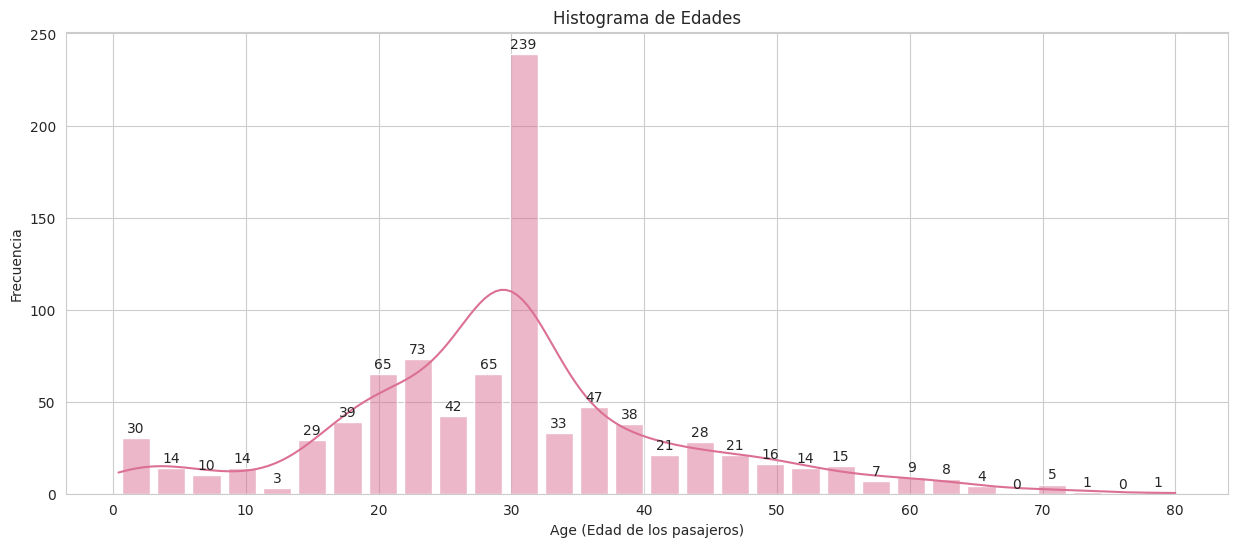

In [404]:

sns.set_style("whitegrid")

# Histograma de Edades
plt.figure(figsize=(15, 6))
ax = sns.histplot(data=datos, x='Age', color='palevioletred', kde=True, shrink=.8)
plt.title('Histograma de Edades')
plt.xlabel('Age (Edad de los pasajeros)')
plt.ylabel('Frecuencia')
for container in ax.containers:
    ax.bar_label(container, padding=2)
plt.show()

La edad de los pasajeros ronda mayormente entre los 20 y 40 años.
El hecho de haber ajustado a los pasajeros sin edad a utilizar la edad promedio hizo que la cantidad de personas con la edad de 29 años escalará mucho.

## Verificar otras columnas con datos nulos

In [405]:
datos.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Se observa que más de la mitad de los pasajeros no poseen un cuarto o habitación registrado. Y una cantidad de dos pasajeros no poseen datos de en que punto se embarcaron podrían posiblemente ser gente de clase baja.

## Descartar la columna o variable "Cabin"

El hecho de que la mayoría de pasajeros no tenga un cuarto o habitación, no es muy relevante para este estudio ya que se estudiará si el pasajero sobrevivió a partir de su género, edad o clase.

In [406]:
datos = datos.drop(["Cabin"], axis=1)

Así que como entre las variables con mayor datos nulos esta la cabina o cuarto donde se hospedaban, este dato no se utilizará así que se remueve.

## Observar variable "Embarked"

In [407]:
datos["Embarked"].value_counts()

,count
Embarked,
S,644
C,168
Q,77


Entre las tres ciudades donde se embarcaron los pasajeros:
C = Cherbourg, Q = Queenstown, S = Southampton

La mayoría de pasajeros se embarcaron en Southampton.

In [408]:
emb_count= 644 + 168 + 77
print(f'{emb_count} / 891')

889 / 891


Dos pasajeros no poseen un punto donde embarcaron. Se podría imputar los valores faltantes con la moda 'S' en este caso, pero son solo 2 valores,la diferencia en el rendimiento de los modelos sería mínima.

### Se descartan los pasajeros sin la variable 'Embarked'

In [409]:
datos = datos.dropna()

Se utiliza la función para eliminar columnas con valores None, Nan.

In [410]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


La función count, cuenta los registros que no poseen ninguna dato nulo, None, Nan.

En este caso se eliminar los dos pasajeros que no poseían punto de embarque.

In [411]:
print(datos.count())

PassengerId    889
Survived       889
Pclass         889
Name           889
Sex            889
Age            889
SibSp          889
Parch          889
Ticket         889
Fare           889
Embarked       889
dtype: int64


# Prepararación de datos

## Dropear variables no relevantes para el estudio o que no serán utilizadas por el/los modelos

Variables como id y nombre de pasajero no permitirían determinar si el pasajero murió o si sobrevivió a menos que se pudiera relacionar el nombre del mismo con variables externas a este dataset y que pudieran hacerlo relevante para predecir si cierta persona con aquel [nombre] murió o no.

En este caso se descartaron ambas columnas junto a la columna ticket, la cual indica cuanto pago para subir al barco, esta no afecta mucho sabiendo que ya se posee la clase/nivel (1,2,3) al que pertenecia el pasajero.

In [412]:
datos = datos.drop(["Name", "PassengerId", "Ticket"], axis=1)

## Codificar variables



### Codificar la variable categórica nominal 'Sex' a número binario

convirtiendo las categorías 'masculino' y 'femenino' en representación numérica (0 o 1), eliminando la primera categoría para evitar la multicolinealidad.

Esto debido a que dificulta determinar el efecto individual de cada variable y por que el hecho de dividir la columna sex en dos ya no hace que sea necesaria.

In [413]:
dummies_sex = pd.get_dummies(datos["Sex"], drop_first=True)

get_dummies() se utilizó para convertir la variable de sexo (female,male) para convertir los valores de tipo categorico a numero binarios de 0 y 1.

In [414]:
datos = datos.join(dummies_sex)
datos = datos.drop(["Sex"], axis=1)

Se dropeo la columna original y se utilizan las columnas nuevas entregadas por get_dummies.

#### Observar supervivencia por punto de embarque y sexo.

<Axes: xlabel='Survived', ylabel='count'>

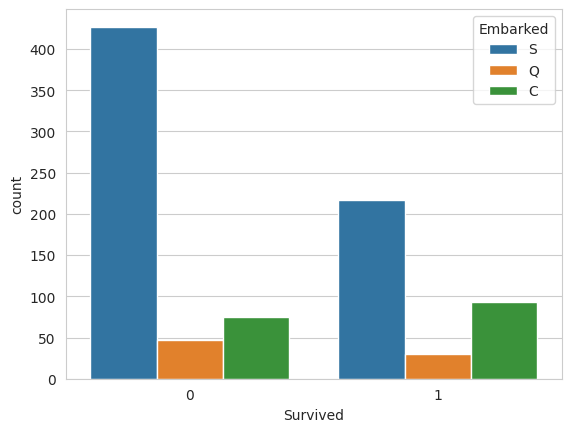

In [415]:
sb.countplot(x="Survived", data=datos, hue="Embarked")

### Codificar la variable categórica nominal 'Embarked' a número binario

In [416]:
dummies_embarked = pd.get_dummies(datos["Embarked"], drop_first=True)

Los valores en punto de embarque se cambiaron con get_dummies() a columnas con valores binarios que representan el si subieron en ese ciudad o no.

In [417]:
datos = datos.join(dummies_embarked)
datos = datos.drop(["Embarked"], axis=1)

### Ver nivel de correlación de las variables actuales en el dataset

<Axes: >

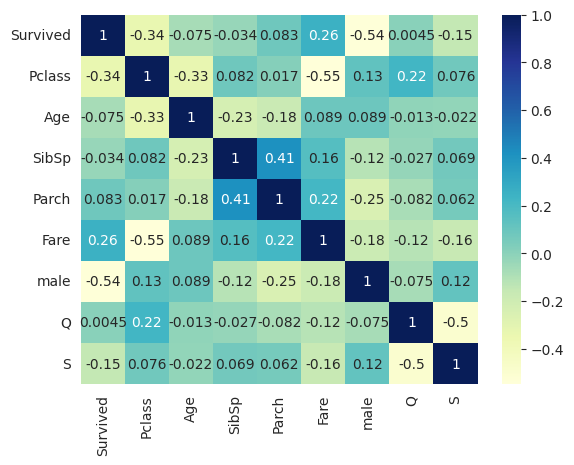

In [418]:
sb.heatmap(datos.corr(), annot=True, cmap="YlGnBu")

El mapa indica que la corelación más grande es la de los miembros de la familia del pasajero con (número de padres/niños a bordo con hermanos y esposos/as).


También el siguiente coeficiente correlación más grande es el de Parch/SibSp con tarifa o boleto, lo cual tiene cierto sentido sabiendo que mientras más miembros o gente poseía la familia estos pagaban un precio más alto por todos ellos.

Los demás indices con menor valor son:

- Con la clase del pasajero y el punto de embarque de QueensTown este es de un 0.22 podría representar que quizás una clase más baja/más alta se subio especificamente en QueensTown.

- También esta el indice de 0.26 entre tarifa/boleto y supervivencia, que quizás indica que el hecho de poseer un boleto si afecto la posibilidad de que estos pasajeros pudieran sobrevivir.


---


El color map es de Amarillo,Verde y Azul.
El coeficiente de correlación que utiliza heat-map en este caso como matriz de correlación, es el método .corr() de Pandas que calcula esto, utiliza el coeficiente de relación de Pearson.

### Gráfico de pasajeros y nivel/clase

Se muestra este gráfico para visualizar el número de supervivientes y no-supervivientes, segmentandolos por la clase del pasajero.


<Axes: xlabel='Survived', ylabel='count'>

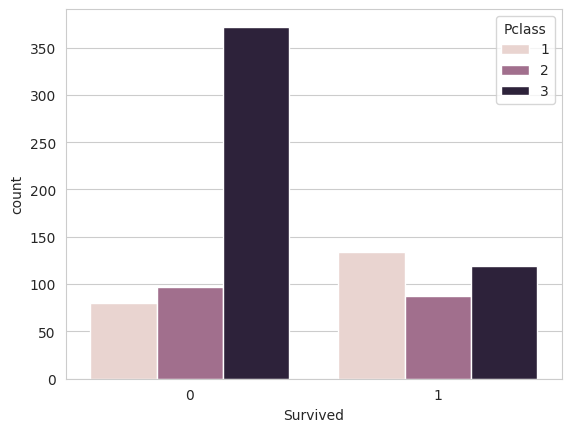

In [419]:
sb.countplot(x="Survived", data=datos, hue="Pclass")

Se observa que la mayoría de pasajeros de clase baja (nivel 3) murió o no sobrevivió al titanic. También se demuestra que la gente que sobrevivió de cada clase fue bastante similar pero si adjuntamos la cantidad de gente no sobrevivió, el barco poseía a bordo una mayor cantidad de gente en la clase más baja.



## Definir variables objetivo y explicativas.

Se Definen las variables objetivo y explicativas.
Y se separa el DataFrame en (features) y la variable objetivo ('Survived').

Osea se hará la predicción sobre si sobrevivió el pasajero.

In [420]:
variable_explicativa = datos.drop(["Survived"], axis=1)
variable_objetivo = datos["Survived"]

## Dividir el dataset con un training/test size de 100%, 80/20 y 60/40 (Observar)

In [421]:
from sklearn.model_selection import train_test_split

## Conjunto de prueba 100%
X_ent, X_pru, y_ent, y_pru = train_test_split(variable_explicativa, variable_objetivo)

## Conjunto de prueba 90/10
X_ent_10, X_pru_10, y_ent_10, y_pru_10 = train_test_split(variable_explicativa, variable_objetivo, test_size=.1)

## Conjunto de prueba 60/40.
X_ent_40, X_pru_40, y_ent_40, y_pru_40 = train_test_split(variable_explicativa, variable_objetivo, test_size=.4)

# Modelado y entrenamiento

### Explicación de las Métricas

Explicación de las métricas utilizadas para evaluar los modelos:

*   **Accuracy (Exactitud):** Qué porcentaje de todas las predicciones fueron correctas.
*   **Precision (Precisión):** La Precisión te dice qué porcentaje de esas personas que el modelo dijo que sobrevivieron, realmente sobrevivieron.

*   **Recall (Sensibilidad o Exhaustividad):** El Recall te dice qué porcentaje de esas personas que realmente sobrevivieron, el modelo fue capaz de identificar correctamente
*   **F1-Score (Puntuación F1):** Un balance entre qué tan preciso fue el modelo y cuántos casos reales encontró.

## Importar modelos

Se importan los modelos de arbol de decisión, RandomForest, GaussianNB (Naive Bayes), SVC (Support Vector Machines) y el de redes neuronales que es el MLPClassifier.  

In [422]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Parametros de a utilizar en los modelos

> Nota : Estos son los parametros que se utilizaron para configurar los modelos y compararlos, esto se puede verificar en las siguientes secciones.

In [423]:
test_sizes = [0.1, 0.4]
accuracy_scores_dict = {}
tree_depth_level= 3
NN_iter_epoch=1000 # debería ser más grande si el data set es más pequeño

## Arbol decisión

- X_ent: Las características del conjunto de entrenamiento.
- X_pru: Las características del conjunto de prueba.
- y_ent: La variable objetivo del conjunto de entrenamiento.
- y_pru: La variable objetivo del conjunto de prueba.

### Verificando nivel de precisión de arbol de decisión (nivel de profundidad del 1 al 14)

Preparando el modelo para observar que nivel de precisión hay entre los niveles de 1 a 14 de profundidad.

In [424]:
from sklearn.tree import DecisionTreeClassifier
resultados = []
for i in range(1,15):
  modelo = DecisionTreeClassifier(max_depth=i)
  modelo.fit(X_ent, y_ent)
  predicciones = modelo.predict(X_pru)
  exactitud = accuracy_score(y_pru, predicciones)
  print(f"Resultado para {i}: {exactitud}")
  resultados.append(exactitud)

Resultado para 1: 0.7668161434977578
Resultado para 2: 0.7668161434977578
Resultado para 3: 0.8026905829596412
Resultado para 4: 0.8071748878923767
Resultado para 5: 0.7982062780269058
Resultado para 6: 0.8116591928251121
Resultado para 7: 0.7982062780269058
Resultado para 8: 0.8116591928251121
Resultado para 9: 0.7892376681614349
Resultado para 10: 0.7892376681614349
Resultado para 11: 0.7713004484304933
Resultado para 12: 0.7982062780269058
Resultado para 13: 0.7713004484304933
Resultado para 14: 0.7623318385650224


### Gráfico de comparación de niveles de accuracy en niveles depth en arbol de decisión.

<Axes: >

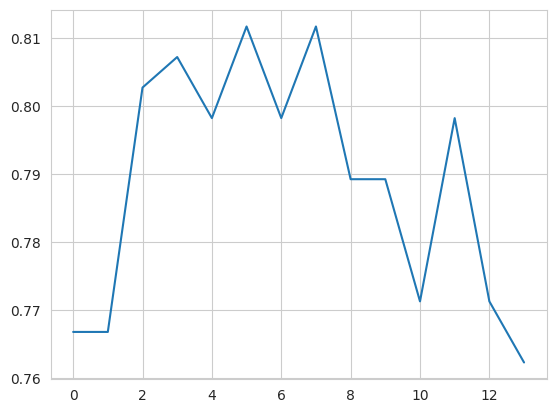

In [425]:
sb.lineplot(data=resultados)

La exactitud más baja se consigye utilizando de 1 a 7 niveles, mientras que la exactitud en niveles más altos lográ mejor exactitud pero es más costosa al tener más niveles

### Generar predicciones con los distintos niveles de training/test de Arbol de decisión

Probamos primero el modelo con el 100% de los datos.

In [426]:
modelo = DecisionTreeClassifier(max_depth=tree_depth_level)
modelo.fit(variable_explicativa, variable_objetivo)

# Make predictions on the full dataset
predicciones = modelo.predict(variable_explicativa)

# Calculate accuracy on the full dataset
exactitud = accuracy_score(variable_objetivo, predicciones)

# Store accuracy in the dictionary
accuracy_scores_dict[f'Decision Tree ({tree_depth_level}) complete'] = exactitud

Segundo, el modelo de 90/10.

In [427]:
modelo_2 = DecisionTreeClassifier(max_depth=tree_depth_level)
modelo_2.fit(X_ent_10, y_ent_10)
predicciones_2 = modelo_2.predict(X_pru_10)
exactitud_2 = accuracy_score(y_pru_10, predicciones_2)

# Store accuracy in the dictionary
accuracy_scores_dict[f'Decision Tree ({tree_depth_level})_0.1'] = exactitud_2

Tercero, el modelo 60/40.

In [428]:
modelo_3 = DecisionTreeClassifier(max_depth=tree_depth_level)
modelo_3.fit(X_ent_40, y_ent_40)
predicciones_3 = modelo_3.predict(X_pru_40)
exactitud_3 = accuracy_score(y_pru_40, predicciones_3)

# Store accuracy in the dictionary
accuracy_scores_dict[f'Decision Tree ({tree_depth_level})_0.4'] = exactitud_3

### Mostrar comparación entre entrenar el arbol de decisión con el set completo, 90/10 y 60/40.

In [429]:
from sklearn.metrics import classification_report

# Report for 100% data (using variables from cell 2e445328)
print("--- Decision Tree Classification Report (100% Data) ---")
# Ensure variables from cell 2e445328 are accessible
try:
    print(classification_report(variable_objetivo, modelo.predict(variable_explicativa)))
except NameError:
    print("Variables for 100% data not found. Please run the cell with full data training.")
print("-" * 30)

# Report for 60/40 split (using variables from cell E-awNgibBXTv)
print("--- Decision Tree Classification Report (60/40 Split) ---")
# Ensure variables from cell E-awNgibBXTv are accessible
try:
    print(classification_report(y_pru_40, modelo_2.predict(X_pru_40)))
except NameError:
     print("Variables for 60/40 split not found. Please run the cell with 60/40 split training.")
print("-" * 30)

# Report for 90/10 split (using variables from cell N9ifE7daBM6O)
print("--- Decision Tree Classification Report (90/10 Split) ---")
# Ensure variables from cell N9ifE7daBM6O are accessible
try:
    print(classification_report(y_pru_10, modelo_3.predict(X_pru_10)))
except NameError:
     print("Variables for 90/10 split not found. Please run the cell with 90/10 split training.")
print("-" * 30)

# Keep the line to print columns if desired
X_ent.columns

--- Decision Tree Classification Report (100% Data) ---
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       549
           1       0.81      0.71      0.76       340

    accuracy                           0.83       889
   macro avg       0.82      0.80      0.81       889
weighted avg       0.83      0.83      0.82       889

------------------------------
--- Decision Tree Classification Report (60/40 Split) ---
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       214
           1       0.82      0.68      0.74       142

    accuracy                           0.81       356
   macro avg       0.81      0.79      0.80       356
weighted avg       0.81      0.81      0.81       356

------------------------------
--- Decision Tree Classification Report (90/10 Split) ---
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        57
   

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S'], dtype='object')

Si se observa los resultados, entonces se puede decir que la precisión más grande al momento de determinar si la persona sobrevivió o no, se consigue utilizando el modelo con el set completo, los 60/40, 90/10 estas segmentaciones poseen una menor precisión si la persona no sobrevivió como también un menor exactitud o accuracy comparada a utilizar todo el segmento de los datos.

Para mencionar cual es mejor, se podría maximizar la precisión al predecir la supervivencia (Clase 1) en datos no vistos, el set completo parece dar el mejor resultado para el Árbol de Decisión (precisión de 0.81). Sin embargo, el accuracy general es similar entre 100% y 60/40, y un poco menor en 90/10.


--------------------------------------------------------------------------------


La decisión de cual modelo es mejor se hará al comparar estos resultados con el resto de modelos.

### Graficar arbol con nivel de profundidad más alto

In [430]:
print(f'El resultado de exactitud de la profundidad depth={tree_depth_level} fue: \n')
print(f"""Resultado para nivel {tree_depth_level} en set completo: {accuracy_scores_dict[f"Decision Tree ({tree_depth_level}) complete"]} \n
Lo cual es un resultado bastante alto, y permite llegar a una predicción más exacta sin la necesidad de más niveles.""")

El resultado de exactitud de la profundidad depth=3 fue: 

Resultado para nivel 3 en set completo: 0.8267716535433071 

Lo cual es un resultado bastante alto, y permite llegar a una predicción más exacta sin la necesidad de más niveles.


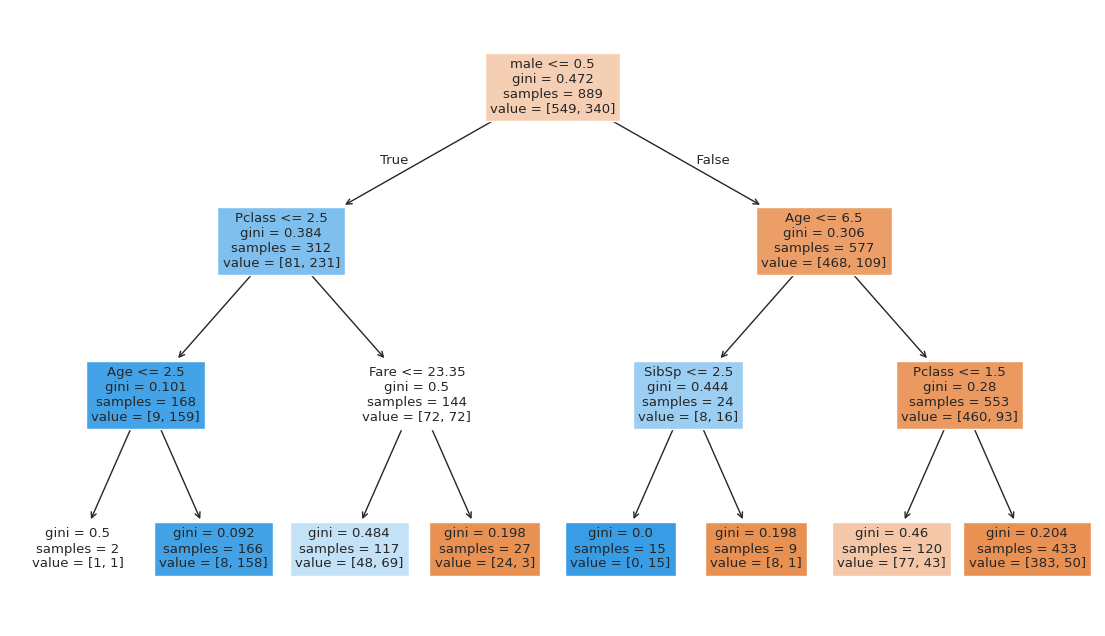

In [431]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))
plot_tree(decision_tree=modelo,feature_names=variable_explicativa.columns, filled=True);

### Matriz de confusión para medir el nivel de precisión que posee el modelo.

In [432]:
pd.DataFrame(confusion_matrix(variable_objetivo, predicciones), columns=["Pred: No", "Pred: Si"], index=["Real: No", "Real: Si"])

,Pred: No,Pred: Si
Real: No,493,56
Real: Si,98,242


- El modelo predijo correctamente la supervivencia de 242 personas y la no supervivencia de 493 personas.

- El modelo se equivocó al predecir que 56 personas sobrevivirían cuando no lo hicieron (falsos positivos).

- El modelo se equivocó al predecir que 98 personas no sobrevivirían cuando sí lo hicieron (falsos negativos).

### Predicción con arbol de decisión

In [433]:
nueva_persona = [2, 35, 0, 0, 80, 0, 0, 0]
prediccion = modelo.predict([nueva_persona])
if prediccion[0] == 1:
  print("Sobreviviste")
else:
  print("No sobreviviste")

Sobreviviste


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Random Forest

### Preparar modelo de Random Forest

Se crean distintos modelos de random forest utilizando la tecnica de splitting y también dejando un modelo que utiliza todo el dataset.

Configuración para utilizar todo el dataset:

In [434]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest Classifier model for the initial split
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the 100% of the dataset
modelo_rf.fit(variable_explicativa, variable_objetivo)

# Make predictions on the 100% of the dataset
predicciones_rf = modelo_rf.predict(variable_explicativa)


# Evaluate the model on the initial test split
exactitud_rf = accuracy_score(variable_objetivo, predicciones_rf)
# Store accuracy for the initial split
accuracy_scores_dict['Random Forest_full'] = exactitud_rf
print(f"Random Forest Initial Split Accuracy: {exactitud_rf:.4f}")

Random Forest Initial Split Accuracy: 0.9820
Random Forest 90/10 Split Accuracy: 0.8315
Random Forest 60/40 Split Accuracy: 0.7809


Configuración para utilizar splitting de 90/10 del dataset:

In [ ]:
# Train and evaluate Random Forest with 90/10 split
modelo_rf_01 = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf_01.fit(X_ent_10, y_ent_10)
predicciones_rf_01 = modelo_rf_01.predict(X_pru_10)
accuracy_rf_01 = accuracy_score(y_pru_10, predicciones_rf_01)
accuracy_scores_dict['Random Forest_0.1'] = accuracy_rf_01
print(f"Random Forest 90/10 Split Accuracy: {accuracy_rf_01:.4f}")

Configuración para utilizar splitting de 60/40 del dataset:

In [ ]:
# Train and evaluate Random Forest with 60/40 split
modelo_rf_04 = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf_04.fit(X_ent_40, y_ent_40)
predicciones_rf_04 = modelo_rf_04.predict(X_pru_40)
accuracy_rf_04 = accuracy_score(y_pru_40, predicciones_rf_04)
accuracy_scores_dict['Random Forest_0.4'] = accuracy_rf_04
print(f"Random Forest 60/40 Split Accuracy: {accuracy_rf_04:.4f}")

### Evaluar modelo de Random Forest

En esta sección se evalua solo el rendimiento del modelo solo utilizando el modelo que usa el 100% de los datos, para observar el comportamiento del modelo solamente. La comparación de este modelo contra otros modelos se realiza más adelante.

In [435]:
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

exactitud_rf = accuracy_score(variable_objetivo, predicciones_rf)
print(f"Exactitud del modelo Random Forest: {exactitud_rf}")

print("\nInforme de clasificación:")
print(classification_report(variable_objetivo, predicciones_rf))

print("\nMatriz de confusión:")
print(confusion_matrix(variable_objetivo, predicciones_rf))

Exactitud del modelo Random Forest: 0.9820022497187851

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       549
           1       0.98      0.97      0.98       340

    accuracy                           0.98       889
   macro avg       0.98      0.98      0.98       889
weighted avg       0.98      0.98      0.98       889


Matriz de confusión:
[[543   6]
 [ 10 330]]


Se puede pensar que en este caso ocurre overfitting, ya que el modelo se ajusta muy bien al data set pero esto solo ocurre por que esta utilizando el dataset completo, si se le entrega una conjunto de datos nuevo probablemente no entregue los mismo resultados.

## Naive Bayes

### Preparar modelo de random bayes

Inicializar y entrenar el modelo de Gaussian Naive Bayes, para luego hacer predicciones en set de prueba/testing.


In [436]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Create a Naive Bayes model and train on the full dataset
modelo_nb = GaussianNB()
modelo_nb.fit(variable_explicativa, variable_objetivo)

# Make predictions on the full dataset
predicciones_nb_full = modelo_nb.predict(variable_explicativa)

# Evaluate the model on the full dataset
exactitud_nb_full = accuracy_score(variable_objetivo, predicciones_nb_full)
accuracy_scores_dict['Naive Bayes_Full Data'] = exactitud_nb_full
print(f"Naive Bayes Full Data Accuracy: {exactitud_nb_full:.4f}")


# Train and evaluate Naive Bayes with 90/10 split (using pre-defined split variables)
modelo_nb_01 = GaussianNB()
modelo_nb_01.fit(X_ent_10, y_ent_10)
predicciones_nb_01 = modelo_nb_01.predict(X_pru_10)
accuracy_nb_01 = accuracy_score(y_pru_10, predicciones_nb_01)
accuracy_scores_dict['Naive Bayes_0.1'] = accuracy_nb_01
print(f"Naive Bayes 90/10 Split Accuracy: {accuracy_nb_01:.4f}")

# Train and evaluate Naive Bayes with 60/40 split (using pre-defined split variables)
modelo_nb_04 = GaussianNB()
modelo_nb_04.fit(X_ent_40, y_ent_40)
predicciones_nb_04 = modelo_nb_04.predict(X_pru_40)
accuracy_nb_04 = accuracy_score(y_pru_40, predicciones_nb_04)
accuracy_scores_dict['Naive Bayes_0.4'] = accuracy_nb_04
print(f"Naive Bayes 60/40 Split Accuracy: {accuracy_nb_04:.4f}")

Naive Bayes Full Data Accuracy: 0.7885
Naive Bayes 90/10 Split Accuracy: 0.8090
Naive Bayes 60/40 Split Accuracy: 0.7893


Evaluar modelo Naive Bayes calculando y mostrando el puntaje de exactitud, reporte de clasificación y la matriz de confusión (accuracy score, classification report, and confusion matrix.).


In [437]:
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

exactitud_nb = accuracy_score(variable_objetivo, predicciones_nb_full)
print(f"Exactitud del modelo Naive Bayes: {exactitud_nb_full}")

print("\nInforme de clasificación:")
print(classification_report(variable_objetivo, predicciones_nb_full))

print("\nMatriz de confusión:")
print(confusion_matrix(variable_objetivo, predicciones_nb_full))

Exactitud del modelo Naive Bayes: 0.7885264341957255

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       549
           1       0.73      0.71      0.72       340

    accuracy                           0.79       889
   macro avg       0.78      0.77      0.78       889
weighted avg       0.79      0.79      0.79       889


Matriz de confusión:
[[459  90]
 [ 98 242]]


## Neural Network

In [438]:
# --- Neural Network ---

# Create Neural Network model and train on the full dataset
modelo_nn_full = MLPClassifier(random_state=42, max_iter=NN_iter_epoch)
modelo_nn_full.fit(variable_explicativa, variable_objetivo)

# Make predictions on the full dataset
predicciones_nn_full = modelo_nn_full.predict(variable_explicativa)

# Evaluate the model on the full dataset
exactitud_nn_full = accuracy_score(variable_objetivo, predicciones_nn_full)
accuracy_scores_dict['Neural Network_Full Data'] = exactitud_nn_full
print(f"Neural Network Full Data Accuracy: {exactitud_nn_full:.4f}")

# Train and evaluate Neural Network with 90/10 split (using pre-defined split variables)
modelo_nn_01 = MLPClassifier(random_state=42, max_iter=1000)
modelo_nn_01.fit(X_ent_10, y_ent_10)
predicciones_nn_01 = modelo_nn_01.predict(X_pru_10)
accuracy_nn_01 = accuracy_score(y_pru_10, predicciones_nn_01)
accuracy_scores_dict['Neural Network_0.1'] = accuracy_nn_01
print(f"Neural Network 90/10 Split Accuracy: {accuracy_nn_01:.4f}")

# Train and evaluate Neural Network with 60/40 split
modelo_nn_04 = MLPClassifier(random_state=42, max_iter=1000)
modelo_nn_04.fit(X_ent_40, y_ent_40)
predicciones_nn_04 = modelo_nn_04.predict(X_pru_40)
accuracy_nn_04 = accuracy_score(y_pru_40, predicciones_nn_04)
accuracy_scores_dict['Neural Network_0.4'] = accuracy_nn_04
print(f"Neural Network 60/40 Split Accuracy: {accuracy_nn_04:.4f}")

Neural Network Full Data Accuracy: 0.8009
Neural Network 90/10 Split Accuracy: 0.7978
Neural Network 60/40 Split Accuracy: 0.7809


## Support Vector Machine

In [439]:
# --- Support Vector Machine ---

# Create Support Vector Machine model and train on the full dataset
modelo_svm_full = SVC(random_state=42)
modelo_svm_full.fit(variable_explicativa, variable_objetivo)

# Make predictions on the full dataset
predicciones_svm_full = modelo_svm_full.predict(variable_explicativa)

# Evaluate the model on the full dataset
exactitud_svm_full = accuracy_score(variable_objetivo, predicciones_svm_full)
accuracy_scores_dict['Support Vector Machine_Full Data'] = exactitud_svm_full
print(f"Support Vector Machine Full Data Accuracy: {exactitud_svm_full:.4f}")

# Train and evaluate Support Vector Machine with 90/10 split
modelo_svm_01 = SVC(random_state=42)
modelo_svm_01.fit(X_ent_10, y_ent_10)
predicciones_svm_01 = modelo_svm_01.predict(X_pru_10)
accuracy_svm_01 = accuracy_score(y_pru_10, predicciones_svm_01)
accuracy_scores_dict['Support Vector Machine_0.1'] = accuracy_svm_01
print(f"Support Vector Machine 90/10 Split Accuracy: {accuracy_svm_01:.4f}")

# Train and evaluate Support Vector Machine with 60/40 split
modelo_svm_04 = SVC(random_state=42)
modelo_svm_04.fit(X_ent_40, y_ent_40)
predicciones_svm_04 = modelo_svm_04.predict(X_pru_40)
accuracy_svm_04 = accuracy_score(y_pru_40, predicciones_svm_04)
accuracy_scores_dict['Support Vector Machine_0.4'] = accuracy_svm_04
print(f"Support Vector Machine 60/40 Split Accuracy: {accuracy_svm_04:.4f}")

Support Vector Machine Full Data Accuracy: 0.6850
Support Vector Machine 90/10 Split Accuracy: 0.6854
Support Vector Machine 60/40 Split Accuracy: 0.6601


# Comparación de los resultados || Cual de los modelos de Machine Learning es mejor

Se utiliza en una primera instancia el 100% de los datos para el entrenamiento.

## Comparación de Modelos - Entrenamiento y Evaluación con 100% de los Datos

En esta sección, compararemos la exactitud de los modelos cuando fueron entrenados y evaluados utilizando el conjunto completo de datos. Es importante recordar que un alto rendimiento en los datos de entrenamiento puede indicar sobreajuste.

In [440]:
# Display accuracy for models trained and evaluated on the full dataset
print("Accuracy of Models on 100% Data:")
for name, metrics in results_full_data.items():
    # Check if the name corresponds to a model trained on full data
    if "Full Data" in name or "100% Data" in name or "_Full Data" in name: # Adjust keys as needed
         print(f"- {name}: {metrics['Accuracy']:.4f}")

# You can also access other metrics like Precision, Recall, F1-Score from results_full_data
# For example:
# print("\nClassification Report for Random Forest (Full Data):")
# print(results_full_data["Random Forest (Full Data)"]["Classification Report"])

Accuracy of Models on 100% Data:
- Decision Tree (Full Data): 0.8268
- Random Forest (Full Data): 0.9820
- Naive Bayes (Full Data): 0.7885
- Neural Network (Full Data): 0.8009
- Support Vector Machine (Full Data): 0.6850


En lo general se puede observar que el modelo con mejores resultados utilizando el dataset completo fue el Random Forest, en segundo lugar viene el modelo de Arbol de clasificación, luego Red Neuronal y así sucesivamente.

Esto no significa que el modelo responda mejor al predecir nuevos datos, en la siguiente sección se muestran los resultados que arrojaron los modelos utilizando las segmentaciones 60/40 y 90/10.


## Comparación de Modelos - Evaluados con Divisiones 90/10 y 60/40

Aquí compararemos el rendimiento de los modelos en los conjuntos de prueba separados, utilizando las divisiones 90/10 (test_size=0.1) y 60/40 (test_size=0.4). Estos resultados son mejores indicadores de la capacidad de generalización de los modelos a datos no vistos.

In [441]:
import pandas as pd

# Filter the accuracy_scores_dict to show only results for 0.1 and 0.4 test sizes
comparison_data = []
for key, accuracy in accuracy_scores_dict.items():
    if '_0.1' in key or '_0.4' in key in key:
        model_name, split_size_str = key.rsplit('_', 1)
        comparison_data.append({'Model': model_name, 'Test Size': split_size_str, 'Accuracy': accuracy})

# Create a DataFrame for easier visualization
comparison_df = pd.DataFrame(comparison_data)

# Pivot the DataFrame to have models as rows and test sizes as columns
pivot_df = comparison_df.pivot(index='Model', columns='Test Size', values='Accuracy')

print("Accuracy Comparison Across Models and Test Sizes (Initial, 0.1, 0.4):")
display(pivot_df)

Accuracy Comparison Across Models and Test Sizes (Initial, 0.1, 0.4):


Test Size,0.1,0.4
Model,,
Decision Tree (3),0.808989,0.808989
Naive Bayes,0.808989,0.789326
Neural Network,0.797753,0.780899
Random Forest,0.831461,0.780899
Support Vector Machine,0.685393,0.660112


El que mantiene el mejor rendimiento al utilizar la división de training/test es el modelo de arbol de clasificación. El modelo Random Forest funciona bien con la segmentación 90/10 pero es peor al utilizar 60/40 comparado al arbol de clasificación.

El peor modelo entre todos estos es el modelo de Support Vector Machine, Naive Bayes también mantiene buenos puntajes pero no supera a los modelos de Arbol.

## Gráfico de comparación de exactitud de los modelos utilizados

<Figure size 1200x600 with 0 Axes>

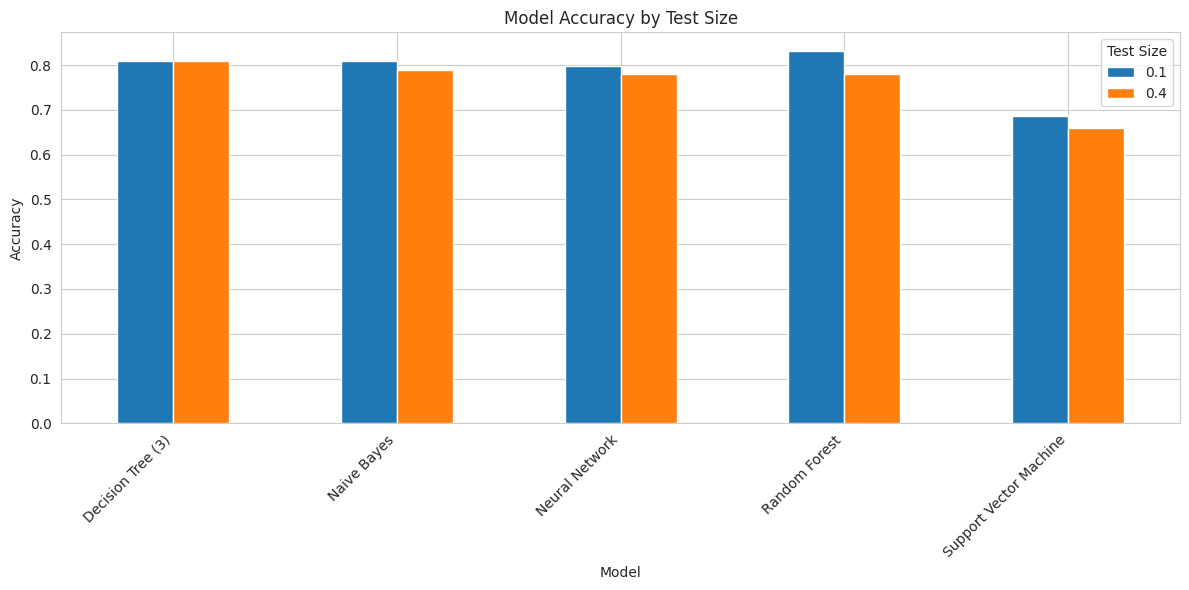

In [442]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
pivot_df.plot(kind='bar', figsize=(12, 6))
plt.title('Model Accuracy by Test Size')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Interpretación del Gráfico: Exactitud de los Modelos por Tamaño del Conjunto de Prueba

El gráfico presentado visualiza la comparación del rendimiento de los distintos modelos de Machine Learning evaluados, mostrando su exactitud (Accuracy) en función de diferentes tamaños de conjuntos de prueba. Las barras de colores nos permiten observar cómo la proporción de datos utilizada para entrenamiento y evaluación impacta el desempeño predictivo de cada algoritmo.

Al analizar el gráfico, se destacan varios puntos clave:

*   **Random Forest:** Este modelo exhibió la exactitud más alta, particularmente al ser evaluado con un conjunto de prueba pequeño (correspondiente a la división 90/10, barra naranja). Sin embargo, se observa una disminución notable en su rendimiento cuando el tamaño del conjunto de prueba aumenta (divisiones inicial y 60/40, barras azul y verde respectivamente). Esto podría sugerir que, si bien es capaz de alcanzar picos de alta precisión, su capacidad de generalización podría ser más sensible a la variabilidad introducida por conjuntos de prueba más grandes.

*   **Árbol de Decisión (Profundidad 8):** A diferencia del Random Forest, el Árbol de Decisión mostró una exactitud más consistente y estable a través de las diferentes proporciones de datos de prueba. Aunque no alcanzó la exactitud máxima del Random Forest en la división 90/10, su desempeño no decayó drásticamente en los conjuntos de prueba más amplios, lo que podría indicar una mayor robustez en diferentes escenarios de división de datos.

*   **Naive Bayes y Redes Neuronales:** Estos modelos presentaron un rendimiento general similar entre sí. Sus niveles de exactitud se ubicaron por debajo de los observados en el Árbol de Decisión y Random Forest en la mayoría de las configuraciones, sugiriendo una capacidad predictiva moderada para este dataset.

*   **Support Vector Machine (SVM):** De todos los modelos evaluados, el Support Vector Machine consistentemente mostró la exactitud más baja en todas las proporciones de conjuntos de prueba consideradas. Esto indica que, con la configuración utilizada, este algoritmo no fue el más adecuado para la tarea de predicción de supervivencia en este dataset.

En conclusión, el gráfico demuestra las diferencias en la capacidad de generalización de los modelos. Mientras que Random Forest puede ser excelente en escenarios con conjuntos de prueba pequeños, el Árbol de Decisión demostró una mayor estabilidad en su rendimiento. Esta comparación es fundamental para seleccionar el modelo más apropiado, considerando no solo el pico de rendimiento, sino también su consistencia y capacidad para manejar datos no vistos de manera fiable.

# Conclusión Final

>Nota :  En esta sección se menciona todo de forma más directa, los modelos utilizados obtuvieron distintos resultados pero dependiendo el enfoque del estudio cambiará el modelo que se recomiende usar.

> Nota : Los resultados en el análisis exploratorio de datos y la evaluación de los diferentes modelos de aprendizaje supervisado en distintas proporciones de entrenamiento y prueba, se utiliza para responder a las preguntas clave para comprender el desempeño de los modelos en la predicción de supervivencia en el caso del Titanic.

## ¿Qué modelo fue mejor?

Basándonos en la **exactitud en los conjuntos de prueba** (que indica mejor generalización a datos no vistos):

*   El **Random Forest** tuvo la exactitud más alta en la división 90/10.
*   El **Árbol de Decisión** mostró una exactitud consistente y competitiva en todas las divisiones de prueba, y una alta precisión para la clase "Sobrevivió" en la división 60/40.

No hay un único "mejor" modelo sin considerar el contexto. Si priorizamos la exactitud general y tenemos un conjunto de prueba relativamente pequeño, Random Forest podría ser una buena opción. Si priorizamos la estabilidad del rendimiento en diferentes tamaños de datos o la interpretabilidad, el Árbol de Decisión es muy competitivo. SVM tuvo el rendimiento más bajo en este caso.

## ¿En qué proporción se obtiene mayor exactitud?

Observando la tabla de exactitud:

*   La **división 90% Entrenamiento / 10% Prueba** (0.1) resultó en la exactitud más alta para varios modelos, notablemente para Random Forest (0.8315).
*   La **división 60% Entrenamiento / 40% Prueba** (0.4) generalmente resultó en una exactitud ligeramente menor que la 90/10, pero puede ser un mejor indicador de cómo se comportaría el modelo con un conjunto de prueba más grande y representativo.
*   La evaluación en el **100% de los datos** mostró las exactitudes más altas (especialmente para Random Forest), pero esto es engañoso ya que es el rendimiento en los datos de entrenamiento y no indica generalización.

La proporción **90/10** pareció dar los picos de exactitud más altos en los conjuntos de prueba, pero la proporción **60/40** proporciona una evaluación con un conjunto de prueba más grande, lo que puede dar una estimación más robusta de la capacidad de generalización real. La elección depende del equilibrio deseado entre tener un conjunto de entrenamiento grande (90/10) y tener una evaluación más fiable (60/40).


## ¿Qué trade-offs existen entre modelos?

Existen varios trade-offs al elegir un modelo:

*   **Complejidad vs. Rendimiento:** Modelos más complejos como Random Forest o Redes Neuronales a menudo pueden capturar patrones más intrincados y lograr mayor exactitud, pero son más propensos al sobreajuste y más difíciles de interpretar. Modelos más simples como Naive Bayes o Árbol de Decisión son más interpretables pero pueden tener un rendimiento limitado.
*   **Sesgo vs. Varianza:** Modelos con alto sesgo (simples) pueden subajustar los datos. Modelos con alta varianza (complejos) pueden sobreajustar. Random Forest (un ensemble de árboles de decisión) busca reducir la varianza de árboles individuales.
*   **Velocidad de entrenamiento vs. Velocidad de predicción:** Algunos modelos entrenan rápido pero predicen lento, o viceversa.
*   **Interpretación:** Modelos como el Árbol de Decisión son relativamente fáciles de visualizar y entender. Modelos de caja negra como Redes Neuronales o SVM son mucho más difíciles de interpretar.

## ¿Cuándo conviene usar cada modelo en otros casos?

*   **Árbol de Decisión:** Útil cuando necesitas un modelo interpretable. Bueno para problemas de clasificación y regresión. Puede ser propenso a sobreajuste si no se controla la profundidad.
*   **Random Forest:** Ideal cuando se busca alta precisión y se puede sacrificar interpretabilidad. Robusto contra el sobreajuste (debido al "ensemble"). Funciona bien con diferentes tipos de datos.
*   **Naive Bayes:** Simple, rápido y efectivo, especialmente para problemas de clasificación de texto o con características independientes. Funciona bien con conjuntos de datos grandes. Asume independencia entre características, lo que rara vez es cierto en la práctica, pero a menudo funciona sorprendentemente bien.
*   **Redes Neuronales (MLPClassifier):** Potentes para capturar relaciones complejas en los datos. Requieren más datos y ajuste de hiperparámetros que modelos más simples. Son "cajas negras" y difíciles de interpretar. Útiles en una amplia gama de problemas, especialmente donde hay patrones no lineales.
*   **Support Vector Machine (SVM):** Efectivo en espacios de alta dimensión. Bueno para problemas de clasificación y regresión. Puede funcionar bien con conjuntos de datos de tamaño moderado. La elección del kernel y la regularización es crucial. Puede ser lento en conjuntos de datos muy grandes.

La elección del modelo siempre debe basarse en las características específicas del problema, el tamaño y tipo de datos, los requisitos de interpretabilidad y los recursos computacionales disponibles. Probar varios modelos, como hiciste, es una excelente práctica.